# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


In [56]:
import time

In [2]:
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
%matplotlib inline


# Mount Drive

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change current working directory

In [9]:
# os.chdir('/content/drive/MyDrive/ironhack-spotiProject')

# Load Datasets

In [5]:
top100 = pd.read_csv('data/top100_a (1).csv')

In [6]:
top100.head()

,Unnamed: 0,Unnamed: 0.1,song,singer,id,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6.0,-5.338,0.0,0.0557,0.3420,0.00101,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0
1,1,1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,https://open.spotify.com/track/1rDQ4oMwGJI7B4t...,0.905,0.563,8.0,-6.135,1.0,0.1020,0.0254,0.00001,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948.0,4.0
2,2,2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,https://open.spotify.com/track/59nOXPmaKlBfGMD...,0.463,0.642,1.0,-4.474,1.0,0.3400,0.3140,0.00000,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893.0,4.0
3,3,3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,https://open.spotify.com/track/1qEmFfgcLObUfQm...,0.714,0.728,10.0,-4.595,1.0,0.0468,0.2980,0.00000,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955.0,4.0
4,4,4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10.0,-6.305,0.0,0.0656,0.0995,0.00000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0


In [32]:
notHot = pd.read_csv('data/not_hot_songs_a (1).csv')

In [33]:
notHot.head()

,Unnamed: 0,Unnamed: 0.1,song,singer,id,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,https://open.spotify.com/track/3AhXZa8sUQht0UE...,0.482,0.721,0.0,-6.839,1.0,0.0321,0.7310,0.000000,0.1890,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600.0,4.0
1,1,1,Strawberry Fields Forever,The Beatles,3Am0IbOxmvlSXro7N5iSfZ,https://open.spotify.com/track/3Am0IbOxmvlSXro...,0.390,0.502,10.0,-12.277,1.0,0.1780,0.3360,0.000138,0.0713,0.289,97.871,audio_features,3Am0IbOxmvlSXro7N5iSfZ,spotify:track:3Am0IbOxmvlSXro7N5iSfZ,https://api.spotify.com/v1/tracks/3Am0IbOxmvlS...,https://api.spotify.com/v1/audio-analysis/3Am0...,247320.0,4.0
2,2,2,Satisfaction,The Rolling Stones,2PzU4IB8Dr6mxV3lHuaG34,https://open.spotify.com/track/2PzU4IB8Dr6mxV3...,0.723,0.863,2.0,-7.890,1.0,0.0338,0.0383,0.031700,0.1280,0.931,136.302,audio_features,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...,https://api.spotify.com/v1/audio-analysis/2PzU...,222813.0,4.0
3,3,3,Imagine,John Lennon,7pKfPomDEeI4TPT6EOYjn9,https://open.spotify.com/track/7pKfPomDEeI4TPT...,0.547,0.257,0.0,-12.358,1.0,0.0252,0.9070,0.183000,0.0935,0.169,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867.0,4.0
4,4,4,What’s Going On,Marvin Gaye,3Um9toULmYFGCpvaIPFw7l,https://open.spotify.com/track/3Um9toULmYFGCpv...,0.283,0.716,1.0,-9.632,0.0,0.0986,0.4470,0.000000,0.3990,0.828,201.960,audio_features,3Um9toULmYFGCpvaIPFw7l,spotify:track:3Um9toULmYFGCpvaIPFw7l,https://api.spotify.com/v1/tracks/3Um9toULmYFG...,https://api.spotify.com/v1/audio-analysis/3Um9...,233000.0,4.0


In [30]:
top100.type.value_counts(dropna=False)

audio_features    99
Name: type, dtype: int64

In [31]:
notHot.type.value_counts(dropna=False)

audio_features    3328
NaN                676
Name: type, dtype: int64

In [ ]:
# Drop dirty columns

In [34]:
top100.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace= True)

In [35]:
top100

,song,singer,id,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6.0,-5.338,0.0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0
1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,https://open.spotify.com/track/1rDQ4oMwGJI7B4t...,0.905,0.563,8.0,-6.135,1.0,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948.0,4.0
2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,https://open.spotify.com/track/59nOXPmaKlBfGMD...,0.463,0.642,1.0,-4.474,1.0,0.3400,0.3140,0.000000,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893.0,4.0
3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,https://open.spotify.com/track/1qEmFfgcLObUfQm...,0.714,0.728,10.0,-4.595,1.0,0.0468,0.2980,0.000000,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955.0,4.0
4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10.0,-6.305,0.0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Otro Atardecer,Bad Bunny & The Marias,0E0DRHf5PfMeor0ZCwB3oT,https://open.spotify.com/track/0E0DRHf5PfMeor0...,0.777,0.595,2.0,-6.790,1.0,0.0375,0.5900,0.001390,0.0669,0.546,108.020,audio_features,0E0DRHf5PfMeor0ZCwB3oT,spotify:track:0E0DRHf5PfMeor0ZCwB3oT,https://api.spotify.com/v1/tracks/0E0DRHf5PfMe...,https://api.spotify.com/v1/audio-analysis/0E0D...,244444.0,4.0
96,We Cry Together,Kendrick Lamar & Taylour Paige,67XC51nlZncNpHmZ8rOU9a,https://open.spotify.com/track/67XC51nlZncNpHm...,0.648,0.680,11.0,-7.276,1.0,0.3450,0.2920,0.000000,0.0808,0.504,106.890,audio_features,67XC51nlZncNpHmZ8rOU9a,spotify:track:67XC51nlZncNpHmZ8rOU9a,https://api.spotify.com/v1/tracks/67XC51nlZncN...,https://api.spotify.com/v1/audio-analysis/67XC...,341307.0,3.0
97,Dos Mil 16,Bad Bunny,4d4ZXH4dr5bYfgErHiZCX2,https://open.spotify.com/track/4d4ZXH4dr5bYfgE...,0.817,0.670,1.0,-6.534,1.0,0.0506,0.1230,0.000002,0.1280,0.495,130.058,audio_features,4d4ZXH4dr5bYfgErHiZCX2,spotify:track:4d4ZXH4dr5bYfgErHiZCX2,https://api.spotify.com/v1/tracks/4d4ZXH4dr5bY...,https://api.spotify.com/v1/audio-analysis/4d4Z...,208615.0,3.0
98,DFMU,Ella Mai,1bdm32mVmoGcek5bVKxQKd,https://open.spotify.com/track/1bdm32mVmoGcek5...,0.708,0.673,6.0,-4.163,1.0,0.0585,0.4990,0.000233,0.1030,0.311,136.969,audio_features,1bdm32mVmoGcek5bVKxQKd,spotify:track:1bdm32mVmoGcek5bVKxQKd,https://api.spotify.com/v1/tracks/1bdm32mVmoGc...,https://api.spotify.com/v1/audio-analysis/1bdm...,197520.0,4.0


In [36]:
notHot.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace= True)

# Data Cleaning

## Treat NaN

In [37]:
top100.isna().sum()

song                0
singer              0
id                  0
url                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id.1                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [12]:
top100[top100.id.isna()]

,Unnamed: 0,Unnamed: 0.1,song,singer,id,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
82,82,82,I'm On One,Future Featuring Drake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
top100.dropna(inplace=True)

In [14]:
top100.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
song                0
singer              0
id                  0
url                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id.1                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [38]:
notHot.isna().sum()

song                193
singer                6
id                  950
url                 950
danceability        952
energy              952
key                 952
loudness            952
mode                952
speechiness         952
acousticness        952
instrumentalness    952
liveness            952
valence             952
tempo               952
type                952
id.1                952
uri                 952
track_href          952
analysis_url        952
duration_ms         952
time_signature      952
dtype: int64

In [39]:
notHot[notHot.loudness.isna()].head(20)

,song,singer,id,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
10,What’d I Say,Ray Charles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,That’ll Be the Day,Buddy Holly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Voodoo Child,The Jimi Hendrix Experience,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,I’m So Lonesome I Could Cry,Hank Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,I’m Waiting for the Man,The Velvet Underground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Don’t Worry Baby,The Beach Boys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,Who’ll Stop the Rain,Creedence Clearwater Revival,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Don’t Be Cruel,Elvis Presley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,I'm Your Hoochie Coochie Man,Muddy Waters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,I’ll Feel a Whole Lot Better,The Byrds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
notHot.dropna(inplace=True)

In [41]:
notHot.isna().sum()

song                0
singer              0
id                  0
url                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id.1                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [42]:
top100.shape

(99, 22)

In [43]:
notHot.shape

(3047, 22)

# Preprocessing

Add Hot feature and concat

In [44]:
top100['hot'] = 'Yes'

In [45]:
top100.head()

,song,singer,id,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6.0,-5.338,0.0,0.0557,0.3420,0.00101,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0,Yes
1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,https://open.spotify.com/track/1rDQ4oMwGJI7B4t...,0.905,0.563,8.0,-6.135,1.0,0.1020,0.0254,0.00001,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948.0,4.0,Yes
2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,https://open.spotify.com/track/59nOXPmaKlBfGMD...,0.463,0.642,1.0,-4.474,1.0,0.3400,0.3140,0.00000,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893.0,4.0,Yes
3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,https://open.spotify.com/track/1qEmFfgcLObUfQm...,0.714,0.728,10.0,-4.595,1.0,0.0468,0.2980,0.00000,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955.0,4.0,Yes
4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10.0,-6.305,0.0,0.0656,0.0995,0.00000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0,Yes


In [46]:
notHot['hot'] = 'No'

In [47]:
notHot.head()

,song,singer,id,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,https://open.spotify.com/track/3AhXZa8sUQht0UE...,0.482,0.721,0.0,-6.839,1.0,0.0321,0.7310,0.000000,0.1890,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600.0,4.0,No
1,Strawberry Fields Forever,The Beatles,3Am0IbOxmvlSXro7N5iSfZ,https://open.spotify.com/track/3Am0IbOxmvlSXro...,0.390,0.502,10.0,-12.277,1.0,0.1780,0.3360,0.000138,0.0713,0.289,97.871,audio_features,3Am0IbOxmvlSXro7N5iSfZ,spotify:track:3Am0IbOxmvlSXro7N5iSfZ,https://api.spotify.com/v1/tracks/3Am0IbOxmvlS...,https://api.spotify.com/v1/audio-analysis/3Am0...,247320.0,4.0,No
2,Satisfaction,The Rolling Stones,2PzU4IB8Dr6mxV3lHuaG34,https://open.spotify.com/track/2PzU4IB8Dr6mxV3...,0.723,0.863,2.0,-7.890,1.0,0.0338,0.0383,0.031700,0.1280,0.931,136.302,audio_features,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...,https://api.spotify.com/v1/audio-analysis/2PzU...,222813.0,4.0,No
3,Imagine,John Lennon,7pKfPomDEeI4TPT6EOYjn9,https://open.spotify.com/track/7pKfPomDEeI4TPT...,0.547,0.257,0.0,-12.358,1.0,0.0252,0.9070,0.183000,0.0935,0.169,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867.0,4.0,No
4,What’s Going On,Marvin Gaye,3Um9toULmYFGCpvaIPFw7l,https://open.spotify.com/track/3Um9toULmYFGCpv...,0.283,0.716,1.0,-9.632,0.0,0.0986,0.4470,0.000000,0.3990,0.828,201.960,audio_features,3Um9toULmYFGCpvaIPFw7l,spotify:track:3Um9toULmYFGCpvaIPFw7l,https://api.spotify.com/v1/tracks/3Um9toULmYFG...,https://api.spotify.com/v1/audio-analysis/3Um9...,233000.0,4.0,No


In [ ]:
# Concat

In [48]:
full = pd.concat([top100,notHot], axis=0)

In [49]:
full.head()

,song,singer,id,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6.0,-5.338,0.0,0.0557,0.3420,0.00101,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0,Yes
1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,https://open.spotify.com/track/1rDQ4oMwGJI7B4t...,0.905,0.563,8.0,-6.135,1.0,0.1020,0.0254,0.00001,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948.0,4.0,Yes
2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,https://open.spotify.com/track/59nOXPmaKlBfGMD...,0.463,0.642,1.0,-4.474,1.0,0.3400,0.3140,0.00000,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893.0,4.0,Yes
3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,https://open.spotify.com/track/1qEmFfgcLObUfQm...,0.714,0.728,10.0,-4.595,1.0,0.0468,0.2980,0.00000,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955.0,4.0,Yes
4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10.0,-6.305,0.0,0.0656,0.0995,0.00000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0,Yes


In [50]:
full.shape

(3146, 23)

In [51]:
full.isna().sum()

song                0
singer              0
id                  0
url                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id.1                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
hot                 0
dtype: int64

# KMeans Clustering

## Split and scale features to use for clustering

In [52]:
full.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3.146000e+03,3146.000000
mean,0.563151,0.638338,5.253655,-8.694358,0.693579,0.079719,0.274943,0.153682,0.203149,0.527760,121.283958,2.486856e+05,3.921488
std,0.174602,0.230269,3.564156,4.136676,0.461080,0.097061,0.308450,0.293931,0.177709,0.255465,28.177589,9.950461e+04,0.376414
min,0.000000,0.002000,0.000000,-38.113000,0.000000,0.000000,0.000002,0.000000,0.013600,0.000000,0.000000,1.129300e+04,0.000000
25%,0.445000,0.479000,2.000000,-10.619750,0.000000,0.033900,0.015225,0.000000,0.094200,0.326000,100.280500,1.907965e+05,4.000000
50%,0.570000,0.670000,5.000000,-7.977500,1.000000,0.044450,0.136000,0.000350,0.129000,0.532000,120.028500,2.326935e+05,4.000000
75%,0.692000,0.828000,9.000000,-5.796750,1.000000,0.076350,0.485000,0.098200,0.258000,0.735000,137.899750,2.837870e+05,4.000000
max,0.979000,0.999000,11.000000,0.321000,1.000000,0.948000,0.996000,0.989000,0.987000,0.988000,208.282000,1.539667e+06,5.000000


In [54]:
# danceability : tempo, duration_ms
X = pd.concat([full.loc[:,'danceability':'tempo'],full.loc[:,'duration_ms':'time_signature']],axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.520,0.731,6.0,-5.338,0.0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303.0,4.0
1,0.905,0.563,8.0,-6.135,1.0,0.1020,0.0254,0.000010,0.1130,0.324,106.998,173948.0,4.0
2,0.463,0.642,1.0,-4.474,1.0,0.3400,0.3140,0.000000,0.0686,0.339,83.389,189893.0,4.0
3,0.714,0.728,10.0,-4.595,1.0,0.0468,0.2980,0.000000,0.1060,0.901,114.996,177955.0,4.0
4,0.836,0.743,10.0,-6.305,0.0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,0.906,0.486,9.0,-7.189,0.0,0.0408,0.0227,0.000757,0.0725,0.821,102.031,236507.0,4.0
3999,0.614,0.551,4.0,-8.558,1.0,0.0274,0.3170,0.000147,0.1510,0.590,126.098,213053.0,4.0
4000,0.387,0.685,7.0,-7.344,1.0,0.0904,0.7050,0.000000,0.3210,0.532,113.674,151453.0,4.0
4001,0.631,0.126,9.0,-19.918,1.0,0.0426,0.4020,0.045800,0.1400,0.488,81.307,124394.0,4.0


In [55]:
X.time_signature.value_counts()

4.0    2885
3.0     208
5.0      31
1.0      18
0.0       4
Name: time_signature, dtype: int64

In [ ]:
# Scale

In [57]:
# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Save the scaler into a file
filename = 'scalers/stdScaler_%s.pickle' %(time.strftime("%Y%m%d"))
with open(filename, 'wb') as file:
  pickle.dump(scaler,file)

# Save X_scaled as dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [58]:
X_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.247177,0.402470,0.209436,0.811495,-1.504488,-0.247499,0.217436,-0.519497,0.606995,0.525554,1.868663,-0.818007,0.208613
1,1.958189,-0.327228,0.770668,0.618797,0.664678,0.229596,-0.809150,-0.522901,-0.507365,-0.797731,-0.507078,-0.751216,0.208613
2,-0.573686,0.015904,-1.193644,1.020391,0.664678,2.682052,0.126645,-0.522934,-0.757252,-0.739005,-1.345075,-0.590947,0.208613
3,0.864098,0.389440,1.331900,0.991136,0.664678,-0.339209,0.074764,-0.522934,-0.546762,1.461250,-0.223190,-0.710940,0.208613
4,1.562942,0.454592,1.331900,0.577695,-1.504488,-0.145485,-0.568879,-0.522934,0.742069,0.760457,-0.437224,-0.571557,0.208613


## Choosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

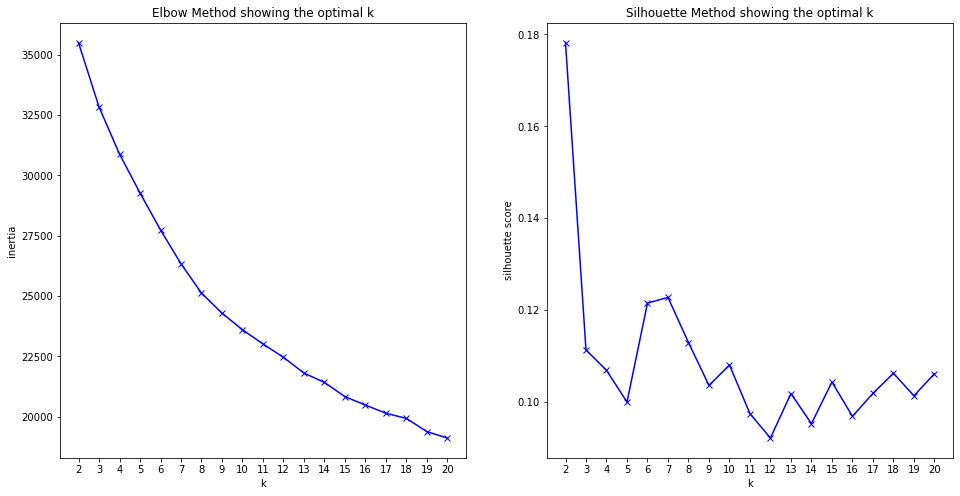

In [59]:
K = range(2, 21)
inertia = []
silhouette = []

for k in K:
    # Train the model
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
                    # , verbose=1)
    kmeans.fit(X_scaled)
    
    # Save the model in a file
    filename = "models/kmeans_%s_%s.pickle" %(time.strftime("%Y%m%d"),k) # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    
    # Compute and record the metrics in the lists
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))

#Plot the metrics
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

There is not really any meaningful elbow. I will use silhouette.  
k = 12

# Load the best model

In [61]:
def load(filename): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 


In [62]:
best_clustering = load('models/kmeans_20220610_12.pickle')

# Concat clusters

In [63]:
cluster = best_clustering.predict(X_scaled)

In [64]:
cluster

array([ 6, 11,  1, ...,  8,  8,  7], dtype=int32)

In [65]:
full['cluster'] = list(cluster)

In [66]:
full

,song,singer,id,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,hot,cluster
0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6.0,-5.338,0.0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0,Yes,6
1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,https://open.spotify.com/track/1rDQ4oMwGJI7B4t...,0.905,0.563,8.0,-6.135,1.0,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948.0,4.0,Yes,11
2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,https://open.spotify.com/track/59nOXPmaKlBfGMD...,0.463,0.642,1.0,-4.474,1.0,0.3400,0.3140,0.000000,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893.0,4.0,Yes,1
3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,https://open.spotify.com/track/1qEmFfgcLObUfQm...,0.714,0.728,10.0,-4.595,1.0,0.0468,0.2980,0.000000,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955.0,4.0,Yes,11
4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10.0,-6.305,0.0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,Groove Thang,Zhané,5MiIyCJ1DYbWLdwWYzyNcJ,https://open.spotify.com/track/5MiIyCJ1DYbWLdw...,0.906,0.486,9.0,-7.189,0.0,0.0408,0.0227,0.000757,0.0725,0.821,102.031,audio_features,5MiIyCJ1DYbWLdwWYzyNcJ,spotify:track:5MiIyCJ1DYbWLdwWYzyNcJ,https://api.spotify.com/v1/tracks/5MiIyCJ1DYbW...,https://api.spotify.com/v1/audio-analysis/5MiI...,236507.0,4.0,No,2
3999,Necklace Jar,The Whiles,6FHuJfyxUXZTB5ItlxA3NK,https://open.spotify.com/track/6FHuJfyxUXZTB5I...,0.614,0.551,4.0,-8.558,1.0,0.0274,0.3170,0.000147,0.1510,0.590,126.098,audio_features,6FHuJfyxUXZTB5ItlxA3NK,spotify:track:6FHuJfyxUXZTB5ItlxA3NK,https://api.spotify.com/v1/tracks/6FHuJfyxUXZT...,https://api.spotify.com/v1/audio-analysis/6FHu...,213053.0,4.0,No,7
4000,Country Jam,Duster Bennett,5iC079JLatqydqNyY5qONk,https://open.spotify.com/track/5iC079JLatqydqN...,0.387,0.685,7.0,-7.344,1.0,0.0904,0.7050,0.000000,0.3210,0.532,113.674,audio_features,5iC079JLatqydqNyY5qONk,spotify:track:5iC079JLatqydqNyY5qONk,https://api.spotify.com/v1/tracks/5iC079JLatqy...,https://api.spotify.com/v1/audio-analysis/5iC0...,151453.0,4.0,No,8
4001,Is It Really Over,Bill Quinn,5tHqSpKWbGu7VAdqdPmg7o,https://open.spotify.com/track/5tHqSpKWbGu7VAd...,0.631,0.126,9.0,-19.918,1.0,0.0426,0.4020,0.045800,0.1400,0.488,81.307,audio_features,5tHqSpKWbGu7VAdqdPmg7o,spotify:track:5tHqSpKWbGu7VAdqdPmg7o,https://api.spotify.com/v1/tracks/5tHqSpKWbGu7...,https://api.spotify.com/v1/audio-analysis/5tHq...,124394.0,4.0,No,8


In [ ]:
# Save full to csv file

In [67]:
# full.to_csv('data/full_%s.csv'%(time.strftime("%Y%m%d")) )